# Como medir el desempeño de un programa en Python

Usando el modulo time


*   Funcion `time()`
*   Devuelve el tiempo recorrido en segundos desde 1/1/1970, en Unix



In [0]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import random


In [0]:
def ordenacionporseleccion(lista):
  fin = len(lista)

  for i in range(fin - 1):
    # Inicialmente, el menor elemento ya visto es el i-ésimo, inicio de la lista
    posicion_de_minimo = i

    # Iterar desde el i-esimo actual posicion minima, hasta el final
    # Encontrar el elemento menor en ese subconjunto
    for j in range(i+1, fin):
      if lista[j] < lista[posicion_de_minimo]:
        posicion_de_minimo = j
    lista[i], lista[posicion_de_minimo] = lista[posicion_de_minimo], lista[i]

In [6]:
lista = [10,3,8,-10,200,17,32]
ordenacionporseleccion(lista)
print(lista)

[-10, 3, 8, 10, 17, 32, 200]


In [0]:
def ordenacionburbuja(lista):
  fin = len(lista)
  for i in range(fin-1, 0, -1):
      for j in range(i):
        if lista[j] > lista[j+1]:
          lista[j], lista[j+1] = lista[j+1], lista[j]
          

In [24]:
lista = [10,-3,8,-10,200,-17,32]
ordenacionburbuja(lista)
print(lista)

[-17, -10, -3, 8, 10, 32, 200]


In [0]:
def lista_aleatoria(n):
  lista = [0 for x in range(n)]
  for i in range(n):
    lista[i]=random.randrange(1000)
  return lista

In [0]:
def calcula_tiempo_ordenacion(funcion, lista):
  start = time.time()
  funcion(lista)
  fin = time.time()
  t = fin - start
  return t

In [0]:
def compara(n):
  lista1 = lista_aleatoria(n)
  lista2 = lista1[:]
  
  t = calcula_tiempo_ordenacion(ordenacionburbuja, lista1)
  print("Algoritmo Burbuja demoró para %d elementos: %f segundos" % (n,t))
  
  t = calcula_tiempo_ordenacion(ordenacionporseleccion, lista2)
  print("Algoritmo por Selección demoró para %d elementos: %f segundos" % (n,t))
  

In [134]:
compara(1000)

Algoritmo Burbuja demoró para 1000 elementos: 0.108347 segundos
Algoritmo por Selección demoró para 1000 elementos: 0.046800 segundos


In [28]:
compara(5000)

Algoritmo Burbuja demoró para 5000 elementos: 2.793359 segundos
Algoritmo por Selección demoró para 5000 elementos: 1.211383 segundos


In [0]:
def grafica_desempeno(n):
  x = range(1, n, 100)
  y1 = []
  y2 = []
  for i in x: 
    lista1 = lista_aleatoria(n) # Datos
    lista2 = lista1[:]          # Clone
    t = calcula_tiempo_ordenacion(ordenacionburbuja, lista1)
    y1.append(t)
    t = calcula_tiempo_ordenacion(ordenacionporseleccion, lista2)
    y2.append(t)
  plt.plot(x,y1, label='Buble Sort')
  plt.plot(x,y2, label='Selection Sort')
  plt.xlabel('number of elements')
  plt.ylabel('time')
  plt.legend()
  plt.show()

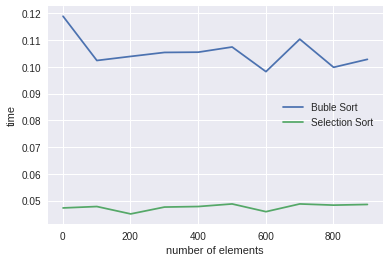

In [140]:
grafica_desempeno(1000)

In [0]:
def busqueda_sequencial(lista, x):
  for i in range(len(lista)):
    if lista[i] == x:
      return i
  return -1

In [0]:
def busqueda_binaria(lista, x):
  primero = 0 
  ultimo = len(lista) - 1
  while primero <= ultimo:
    mitad = (primero + ultimo)//2
    if lista[mitad] == x:
      return mitad
    else:
      if x < lista[mitad]:
        ultimo = mitad - 1
      else:
        primero = mitad + 1
  return -1

In [0]:
def lista_elemento(n):
  lista = lista_aleatoria(n)
  ordenacionporseleccion(lista)
  elemento = lista[random.randrange(n)]
  return lista, elemento

In [0]:
def calcula_tiempo_busqueda(funcion, lista1, elemento):
  start = time.time()
  funcion(lista1, elemento)
  fin = time.time()
  t = fin - start
  return t

In [0]:
def grafica_desempeno(n):
  x = range(1, n, 100)
  y1 = []
  y2 = []
  for i in x: 
    lista, elemento = lista_elemento(i) # Datos
    t = calcula_tiempo_busqueda(busqueda_sequencial, lista, elemento)
    y1.append(t)
    t = calcula_tiempo_busqueda(busqueda_binaria, lista, elemento)
    y2.append(t)
  plt.plot(x,y1, label='Busqueda Sequencial')
  plt.plot(x,y2, label='Busqueda Binaria')
  plt.xlabel('number of elements')
  plt.ylabel('time')
  plt.legend()
  plt.show()

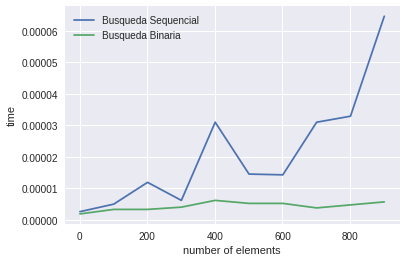

In [138]:
grafica_desempeno(1000)
